# Analyzing EDI files set using Pandas 

From EDI measurment csv file (edi_measurement.csv) to plottings

## Fei Zhang
### 2017-09

### See Similar Notebooks:
* geopandas_csv2shp


In [1]:
import os, sys,glob
%matplotlib inline
from IPython.display import display

import folium
from shapely.geometry import mapping

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [ ]:
def csv_to_geopdf(csvfile):
    
    pdf = pd.read_csv(csvfile)
    mt_locations = [Point(xy) for xy in zip(pdf.LON, pdf.LAT)]
    #OR pdf['geometry'] = pdf.apply(lambda z: Point(z.lon, z.lat), axis=1)
    #if you want to df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}  # WGS84
    crs = {'init': 'epsg:4283'}  # GDA94
    geo_df = gpd.GeoDataFrame(pdf, crs=crs, geometry=mt_locations)

    return geo_df

In [46]:
# Pre-condition: please run the edi_collection.py separately (in commandline)
# to create the edi_measurement.csv needed in the remianing section of this notebook.
# $> python mtpy/core/edi_collection.py   /e/Data/MT_Datasets/3D_MT_data_edited_fromDuanJM /e/tmp6

# path2csv='E:/Data/MT_Datasets/WenPingJiang_SHP/PhaseTensorTipper_Params_1.0986Hz.csv'
#path2csv='E:/example_data_edi_files/edi_measurement.csv'
path2csv='E:/tmp6/edi_measurement.csv'
                                   
print(path2csv)
                                        
path2dir=os.path.dirname(path2csv)
mygdf=csv_to_geopdf(path2csv)

E:/tmp6/edi_measurement.csv


In [47]:
# mygdf.head()
mygdf.shape

(2000, 25)

In [48]:
mygdf.iloc[0]     # [-1] last row or feature

FREQ                                             0.00034
STATION                                      IEB114-010A
LAT                                             -20.5901
LON                                              136.772
ZXXre                                          0.0385766
ZXXim                                           0.130919
ZXYre                                             0.9289
ZXYim                                           0.708359
ZYXre                                          -0.203011
ZYXim                                          -0.507532
ZYYre                                           0.155321
ZYYim                                          0.0272958
TXre                                          0.00265467
TXim                                           0.0627094
TYre                                           -0.147829
TYim                                            -0.12489
RHOxx                                            10.9575
RHOxy                          

In [49]:
mygdf.crs

{'init': 'epsg:4283'}

In [50]:
shape_fname=path2csv.upper().replace('.CSV', '.SHP')   # 'geopandas_made.shp'
outshp=os.path.join(path2dir,shape_fname)


In [51]:
outshp

'E:/TMP6/EDI_MEASUREMENT.SHP'

In [52]:
mygdf.to_file(outshp, driver='ESRI Shapefile')

In [53]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'

#mpl.rcParams['figure.figsize']=(8,30)

In [54]:
#gdf_utm54=mygdf.to_crs({'init':'epsg:32754'})  #.plot()

#outshp=os.path.join(path2dir,'geopandas_made_utm54.shp')

#gdf_utm54.to_file(outshp, driver='ESRI Shapefile')


In [55]:

geojson = mygdf.to_json()

# output jeojson?
# geojson big-string

bounds = mygdf.total_bounds


In [56]:
print bounds

(136.77222222222224, -20.593694444444445, 136.93077777777776, -20.41086111111111)


In [57]:
mygdf.columns

Index([u'FREQ', u'STATION', u'LAT', u'LON', u'ZXXre', u'ZXXim', u'ZXYre',
       u'ZXYim', u'ZYXre', u'ZYXim', u'ZYYre', u'ZYYim', u'TXre', u'TXim',
       u'TYre', u'TYim', u'RHOxx', u'RHOxy', u'RHOyx', u'RHOyy', u'PHSxx',
       u'PHSxy', u'PHSyx', u'PHSyy', u'geometry'],
      dtype='object')

In [58]:
mygdf['ZXYre'].describe()

count    2000.000000
mean       45.302787
std        56.870870
min         0.255651
25%         2.992486
50%        25.259980
75%        68.009981
max       482.738774
Name: ZXYre, dtype: float64

In [59]:
# unique stations
station_list= mygdf['STATION'].unique()

In [60]:
print (station_list)

['IEB114-010A' 'IEB114-012A' 'IEB114-014A' 'IEB114-016A' 'IEB114-018A'
 'IEB114-110A' 'IEB114-112A' 'IEB114-114A' 'IEB114-116A' 'IEB114-118A'
 'IEB114-210A' 'IEB114-212A' 'IEB114-214A' 'IEB114-216A' 'IEB114-218A'
 'IEB114-310A' 'IEB114-312A' 'IEB114-314A' 'IEB114-316A' 'IEB114-318A'
 'IEB114-410A' 'IEB114-412A' 'IEB114-414A' 'IEB114-416A' '14-IEB1418A']


In [61]:
# plot a station's MT data
stid=10

mystation=station_list[stid] #'pb27'

#mygdf2 = mygdf.where (mygdf['FREQ'] == 0.000122)  # not working
mygdf2 = mygdf.loc[mygdf['STATION'] == mystation]


In [62]:
mygdf2.shape

(80, 25)

In [63]:
mydf2=pd.DataFrame(mygdf2)
mydf2['PERIOD'] = mydf2.apply(lambda z: 1.0/z.FREQ, axis=1)

In [64]:
mydf2s= mydf2.sort_values('PERIOD', axis=0, ascending=True, inplace=False)

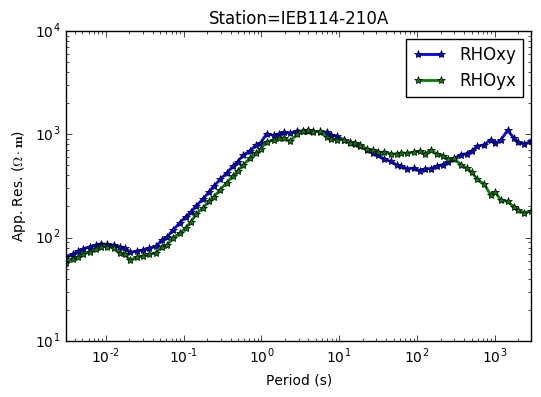

In [65]:
ax=mydf2s.plot(x='PERIOD', y=['RHOxy', 'RHOyx'], logx=True, logy=True, marker='*', 
            title="Station=%s"%mystation)

ax.set_ylabel('App. Res. ($\mathbf{\Omega \cdot m}$)')
ax.set_xlabel('Period (s)')

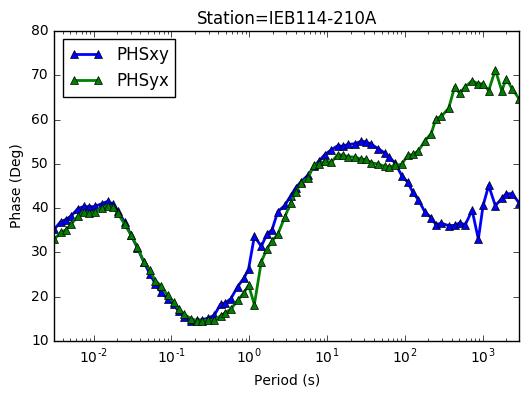

In [66]:
ax=mydf2s.plot(x='PERIOD', y=['PHSxy', 'PHSyx'], logx=True, logy=False, marker='^'
            ,title="Station=%s"%mystation)
ax.set_ylabel('Phase (Deg)')
ax.set_xlabel('Period (s)')